# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'
name_professions = ["Sitter", "kitchener", "It-specialist", "Bookkeeper", "Master of Manicure"]
name_professions_rus = ["Сиделка", "Повар", "Программист",
                        "Бухгалтер", "Маникюр"]


params_sitter = {
    'text': name_professions_rus[0],
    'area': 1,
    'page': 0,
    'per_page': 100
}

params_cook = {
    'text': name_professions_rus[1],
    'area': 1,
    'page': 0,
    'per_page': 100
}

params_programmist = {
    'text': name_professions_rus[2],
    'area': 1,
    'page': 0,
    'per_page': 100
}

params_bookkeeper = {
    'text': name_professions_rus[3],
    'area': 1,
    'page': 0,
    'per_page': 100
}

params_manicure = {
    'text': name_professions_rus[4],
    'area': 1,
    'page': 0,
    'per_page': 100
}

data_sitter = requests.get(URL, params_sitter).json()
data_cook = requests.get(URL, params_cook).json()
data_programmist = requests.get(URL, params_programmist).json()
data_bookkeeper = requests.get(URL, params_bookkeeper).json()
data_manicure = requests.get(URL, params_manicure).json()


datas = [data_sitter, data_cook, data_programmist, data_bookkeeper, data_manicure]

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data_sitter.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
# your code here
data_programmist

{'items': [{'id': '98566623',
   'premium': False,
   'name': 'Frontend-разработчик (Junior)',
   'department': None,
   'has_test': True,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': None,
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': None,
   'response_url': None,
   'sort_point_distance': None,
   'published_at': '2024-05-07T18:09:37+0300',
   'created_at': '2024-05-07T18:09:37+0300',
   'archived': False,
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=98566623',
   'branding': {'type': 'MAKEUP', 'tariff': None},
   'show_logo_in_search': True,
   'insider_interview': None,
   'url': 'https://api.hh.ru/vacancies/98566623?host=hh.ru',
   'alternate_url': 'https://hh.ru/vacancy/98566623',
   'relations': [],
   'employer': {'id': '4219',
    'name': 'Tele2',
    'url': 'https://api.hh.ru/employers/4219',
    'alternate_url': 'https://hh.ru/employer/4219',
 

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
# your code here
for i in range (5):
  print("Количество вакансий ", name_professions[i], ": ", datas[i]['found'], " ", datas[i]['pages'])

Количество вакансий  Sitter :  64   1
Количество вакансий  kitchener :  6018   20
Количество вакансий  It-specialist :  8392   20
Количество вакансий  Bookkeeper :  5742   20
Количество вакансий  Master of Manicure :  614   7


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
        def __init__(self, name, coords):
          self.name = name
          self.coords = coords

        def get_name():
          return self.name

        def get_coords():
          return self.coords

Вспомогательная функция для проверки расположения вакансии в пределах МКАД


In [ ]:
def InsideMkad(n):
  if (n[0] == None or n[1] == None):
    return False;
  return (55.90996 > n[0] > 55.57213 and 37.84515 > n[1] > 37.36725)

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
all_companies = []
all_vacancy_inside_MKAD = []

for i in range(5):
  all_companies.append([])
  all_vacancy_inside_MKAD.append([])

In [ ]:
for i in range(5):
  for j in range (datas[i]['pages']):
    params = {
    'text': name_professions_rus[i],
    'area': 1,
    'page': j,
    'per_page': 100
    }
    new_data = requests.get(URL, params).json()
    item = new_data['items']
    for k in range (len(item)):
      new_name = item[k]["employer"]["name"]
      new_coords = item[k]["address"]
      if (new_coords != None):
        new_coords = (new_coords["lat"], new_coords["lng"])
        if (InsideMkad(new_coords)):
          all_vacancy_inside_MKAD[i].append(item[k])
      all_companies[i].append(Company(new_name, new_coords))
    sleep(2)



(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
# your code here
n = 0
for i in range(5):
  for j in all_companies[i]:
    if j.get_coords != None:
      n += 1
print(n)

6678


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
# your code here
print("Первые 10 вакансий из каждой категории в пределах МКАД")
for i in range(5):
  print(name_professions_rus[i])
  print()
  for j in range(min(10, len(all_vacancy_inside_MKAD[i]))):
    print(all_vacancy_inside_MKAD[i][j])
  print()

Первые 10 вакансий из каждой категории в пределах МКАД
Сиделка

{'id': '97033631', 'premium': False, 'name': 'Сиделка', 'department': None, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': {'from': 100000, 'to': 112500, 'currency': 'RUR', 'gross': False}, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': {'city': 'Москва', 'street': 'Ленинградское шоссе', 'building': '52', 'lat': 55.836615, 'lng': 37.484783, 'description': None, 'raw': 'Москва, Ленинградское шоссе, 52', 'metro': {'station_name': 'Водный стадион', 'line_name': 'Замоскворецкая', 'station_id': '2.29', 'line_id': '2', 'lat': 55.838978, 'lng': 37.487515}, 'metro_stations': [{'station_name': 'Водный стадион', 'line_name': 'Замоскворецкая', 'station_id': '2.29', 'line_id': '2', 'lat': 55.838978, 'lng': 37.487515}], 'id': '14768041'}, 'response_url': None, 'sort_point_distance': None, 'published_at': '2024-04-15T16:28:18+0300', 'crea

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

Sitter


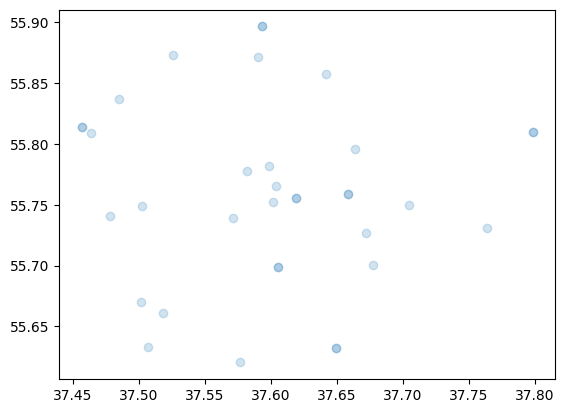

In [ ]:
# your code here
lat = []
lng = []
print(name_professions[0])
for el in all_vacancy_inside_MKAD[0]:
  lat.append(el['address']['lat'])
  lng.append(el['address']['lng'])

plt.scatter(lng, lat, alpha = 0.2)
plt.show()

kitchener


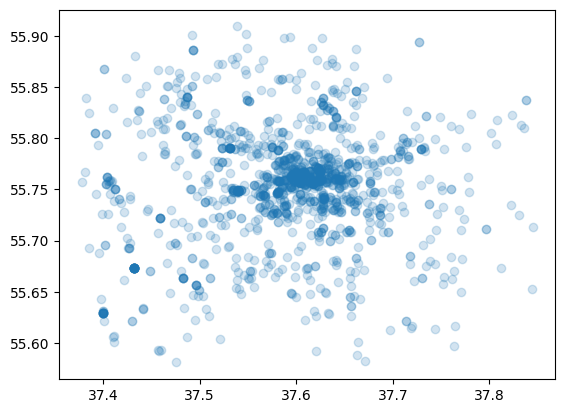

In [ ]:
# your code here
lat = []
lng = []
print(name_professions[1])
for el in all_vacancy_inside_MKAD[1]:
  lat.append(el['address']['lat'])
  lng.append(el['address']['lng'])

plt.scatter(lng, lat, alpha = 0.2)
plt.show()

It-specialist


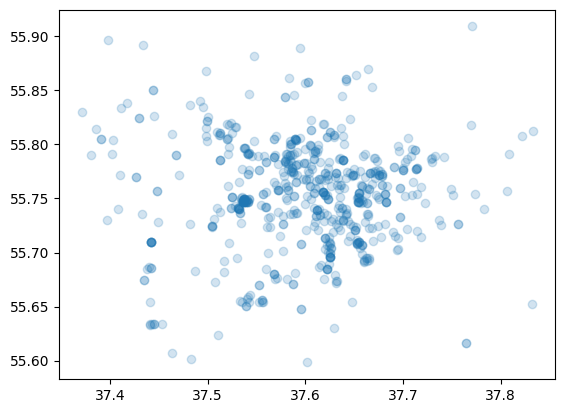

In [ ]:
# your code here
lat = []
lng = []
print(name_professions[2])
for el in all_vacancy_inside_MKAD[2]:
  lat.append(el['address']['lat'])
  lng.append(el['address']['lng'])

plt.scatter(lng, lat, alpha = 0.2)
plt.show()

Bookkeeper


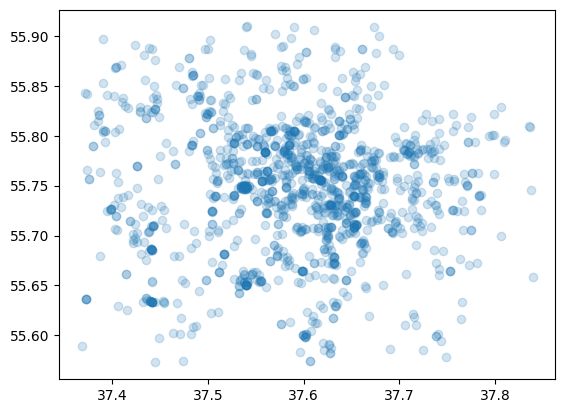

In [ ]:
# your code here
lat = []
lng = []
print(name_professions[3])
for el in all_vacancy_inside_MKAD[3]:
  lat.append(el['address']['lat'])
  lng.append(el['address']['lng'])

plt.scatter(lng, lat, alpha = 0.2)
plt.show()

Master of Manicure


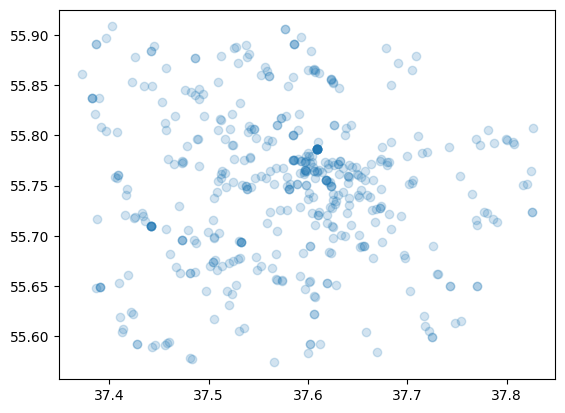

In [ ]:
# your code here
lat = []
lng = []
print(name_professions[4])
for el in all_vacancy_inside_MKAD[4]:
  lat.append(el['address']['lat'])
  lng.append(el['address']['lng'])

plt.scatter(lng, lat, alpha = 0.2)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [ ]:
dict_vacancy = []
for i in range(5):
  new_dict = []
  for el in all_vacancy_inside_MKAD[i]:
    new_dict.append({
        "name" : el["name"],
        "lat" : el["address"]["lat"],
        "lng" : el["address"]["lng"],
        "company" : el["employer"]["name"],
        "salary" : None if el["salary"] == None else (el["salary"]["from"], el["salary"]["to"])
                })
  dict_vacancy.append(new_dict)

In [ ]:
import pandas as pd

import plotly.express as px
colors = ["green", "yellow", "purple", "orange", "red"]

vacancy = pd.DataFrame(dict_vacancy[0])
fig = px.scatter_mapbox(vacancy, lat="lat", lon="lng", hover_name="company", hover_data=["name", "salary"],
                       color_discrete_sequence=[colors[0], 0.2], zoom=8, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [ ]:
import pandas as pd

import plotly.express as px
colors = ["green", "yellow", "purple", "orange", "red"]

vacancy = pd.DataFrame(dict_vacancy[1])
fig = px.scatter_mapbox(vacancy, lat="lat", lon="lng", hover_name="company", hover_data=["name", "salary"],
                       color_discrete_sequence=[colors[1], 0.2], zoom=8, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import pandas as pd

import plotly.express as px
colors = ["green", "yellow", "purple", "orange", "red"]

vacancy = pd.DataFrame(dict_vacancy[2])
fig = px.scatter_mapbox(vacancy, lat="lat", lon="lng", hover_name="company", hover_data=["name", "salary"],
                       color_discrete_sequence=[colors[2], 0.2], zoom=8, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import pandas as pd

import plotly.express as px
colors = ["green", "yellow", "purple", "orange", "red"]

vacancy = pd.DataFrame(dict_vacancy[3])
fig = px.scatter_mapbox(vacancy, lat="lat", lon="lng", hover_name="company", hover_data=["name", "salary"],
                       color_discrete_sequence=[colors[3], 0.2], zoom=8, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import pandas as pd

import plotly.express as px
colors = ["green", "yellow", "purple", "orange", "red"]

vacancy = pd.DataFrame(dict_vacancy[4])
fig = px.scatter_mapbox(vacancy, lat="lat", lon="lng", hover_name="company", hover_data=["name", "salary"],
                       color_discrete_sequence=[colors[4], 0.2], zoom=8, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

Вывод 1: Больше всего предложений находятся в центре Москвы (что и неудивительно, большая часть офисов находится в центре).

Вывод 2: Зарплаты не сильно зависят от удаленности от центра города

Вывод 3: по построенным картам сложно оценивать спрос, но, например, явно видно, что на северо-востоке Москвы он сильно ниже, чем во всех остальных районах (что тоже имеет объяснение - на северо-востоке находится довольно обширная лесопарковая зона)

Вывод 4: учитывая количество вакансий, в будущем без работы я точно не останусь :)

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 105MB/s]


Создадим DataFrame:

In [ ]:
df = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
# your code here
df.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
# your code here
print(f'All briliants: {df.shape[0]}')

All briliants: 219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
# your code here
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [ ]:
str = df[df['total_sales_price']==df['total_sales_price'].max()]
str['total_sales_price'].head(1)

219702    1449881
Name: total_sales_price, dtype: int64

In [ ]:
str = df[df['total_sales_price']==df['total_sales_price'].min()]
str['total_sales_price'].head(1)

0    200
Name: total_sales_price, dtype: int64

(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
# your code here
df.isnull().sum()

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

In [ ]:
print(f'{df.isnull().sum().sum()} null values')

145141 null values


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
# your code here
for col in df.columns:
    if df[col].isnull().any():
        print(f"Column '{col}' has missing values")

Column 'fluor_intensity' has missing values
Column 'fancy_color_overtone' has missing values


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
# your code here
fancy_color_cols = [col for col in df.columns if col.startswith('fancy_color_')]
fluor_cols = [col for col in df.columns if col.startswith('fluor_')]

num_fancy_color_cols = len(fancy_color_cols)
num_fluor_cols = len(fluor_cols)

print(f"Columns starting with 'fancy_color_': {num_fancy_color_cols}")
print(f"Columns starting with 'fluor_': {num_fluor_cols}")


Columns starting with 'fancy_color_': 4
Columns starting with 'fluor_': 2


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:
# your code here


columns_for_delete = fancy_color_cols + fluor_cols

for col in columns_for_delete:
    count = df[col].notnull().sum()
    print(f"'{col}' has {count} informative values.")

'fancy_color_dominant_color' has 219703 informative values.
'fancy_color_secondary_color' has 219703 informative values.
'fancy_color_overtone' has 218053 informative values.
'fancy_color_intensity' has 219703 informative values.
'fluor_color' has 219703 informative values.
'fluor_intensity' has 76212 informative values.


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
# your code here
df = df.drop(columns_for_delete, axis=1)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
# your code here
culet_cols = [col for col in df.columns if col.startswith('culet_')]

df = df.drop(culet_cols, axis=1)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
# your code here
print(f"cost of all diamonds {df['total_sales_price'].sum()})")

cost of all diamonds 1517721991)


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
# your code here
df.iloc[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
# your code here
df.iloc[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
# your code here
df.loc[:, ["cut", "color", "clarity", "cut_quality", "lab", "symmetry", "polish", "girdle_min", "girdle_max"]]

,cut,color,clarity,cut_quality,lab,symmetry,polish,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,STK,STK
...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# your code her
price = df['total_sales_price']
result = price * price.T
result

0                 40000
1                 40000
2                 40000
3                 40000
4                 40000
              ...      
219698    1465775118864
219699    1670556250000
219700    1730529726016
219701    1822500000000
219702    2102154914161
Name: total_sales_price, Length: 219703, dtype: int64

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

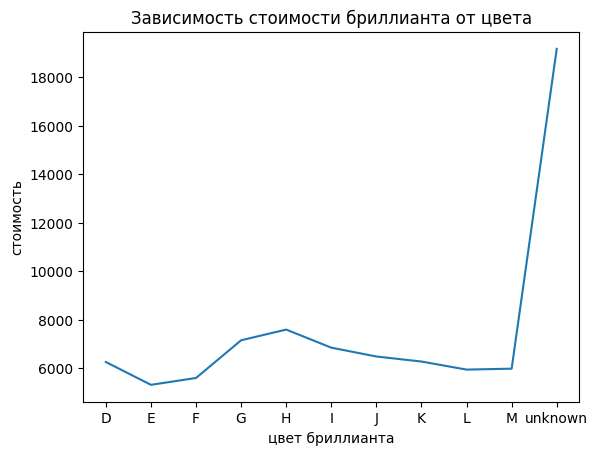

In [ ]:
# your code here
clear_df = df.dropna(subset=['color', 'total_sales_price'])
grouped_df = clear_df.groupby('color')['total_sales_price'].mean()
plt.plot(grouped_df.index, grouped_df.values)
plt.xlabel('цвет бриллианта')
plt.ylabel('стоимость')
plt.title('Зависимость стоимости бриллианта от цвета')
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

In [ ]:
counts = df['lab'].value_counts()
counts

lab
GIA    200434
IGI     15865
HRD      3404
Name: count, dtype: int64

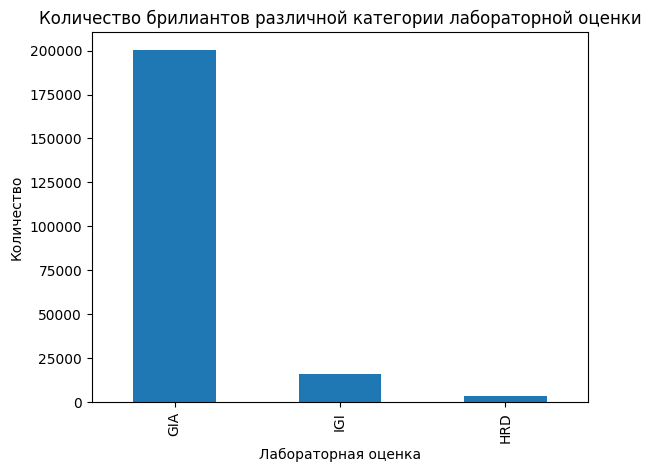

In [ ]:
# your code here

new_df = df[['lab']].replace('unknown', np.nan).dropna()

counts = new_df['lab'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Лабораторная оценка')
plt.ylabel('Количество')
plt.title('Количество брилиантов различной категории лабораторной оценки')
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

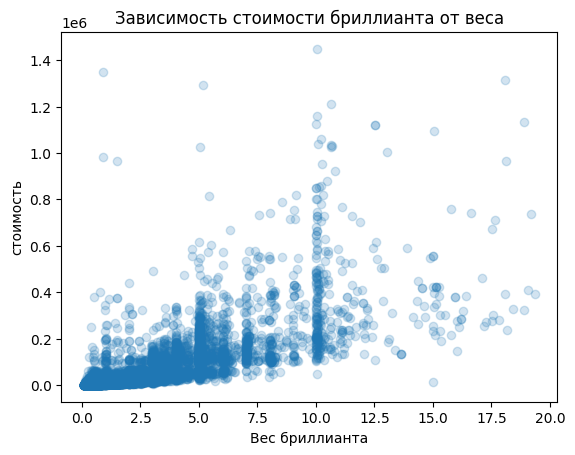

In [ ]:
# your code here

new_df = df[['carat_weight', 'total_sales_price']].replace('unknown', np.nan).dropna()

plt.scatter(new_df['carat_weight'], new_df['total_sales_price'], alpha = 0.2)
plt.xlabel('Вес бриллианта')
plt.ylabel('стоимость')
plt.title('Зависимость стоимости бриллианта от веса')
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

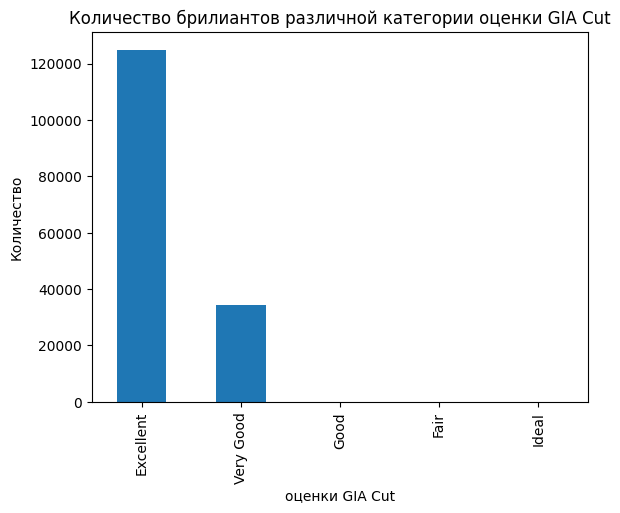

In [ ]:
# your code here

new_df = df[['cut_quality']].replace('unknown', np.nan).dropna()
counts = new_df['cut_quality'].value_counts()
counts.plot(kind='bar')
plt.xlabel('оценки GIA Cut')
plt.ylabel('Количество')
plt.title('Количество брилиантов различной категории оценки GIA Cut')
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

Стоимость бриллианта не сильно зависит от его цвета, зато напрямую зависит от его веса (точнее было бы сказать массы, масса - свойство тела, а вес - сила, действующая на опору или подвес. В отличие от массы, вес может меняться - например, явление невесомости или перегрузки - спускаетесь вы в лифте, ваш вес уменьшился на несколько Ньютонов (спойлер, при этом вы не похудеете, киллограммы никуда не уйдут, просто равнодействующая всех сил уменьшится)).

P.S. Извините, это вьетнамские флэш-бэки...


Еще один вывод, который можно сделать исходя из графиков, большинство бриллиантов имеют лабораторную категорию GIA, и среди бриллиатов категории GIA больше всего алмазов имеют категорию качества огранки Exellent

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [ ]:
# your code here
columns = df.columns.tolist()
columns

['Unnamed: 0',
 'cut',
 'color',
 'clarity',
 'carat_weight',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'girdle_min',
 'girdle_max',
 'total_sales_price']

In [ ]:
model = df[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]

In [ ]:
model.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [ ]:
model = model.sample(frac=1).reset_index(drop=True)
model

,meas_length,meas_width,meas_depth,total_sales_price
0,7.24,7.29,4.62,7692
1,8.35,5.50,3.46,4962
2,5.68,5.48,4.23,7200
3,9.50,9.31,6.38,102361
4,4.28,4.30,2.66,908
...,...,...,...,...
219698,7.12,7.03,5.27,23346
219699,3.85,3.88,2.36,698
219700,0.00,0.00,0.00,2696
219701,4.99,5.05,3.19,2410


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
# your code here
model['minkovskiy_sum'] = ((model['meas_length']) ** 3 + (model['meas_depth']) ** 3 + (model['meas_width']) ** 3) ** (1/3)

model.head()

,meas_length,meas_width,meas_depth,total_sales_price,minkovskiy_sum
0,7.24,7.29,4.62,7692,9.530044
1,8.35,5.50,3.46,4962,9.244256
2,5.68,5.48,4.23,7200,7.509641
3,9.50,9.31,6.38,102361,12.437606
4,4.28,4.30,2.66,908,5.611825


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [ ]:
new_model = model[['total_sales_price', 'minkovskiy_sum']].copy()
new_model.head()

,total_sales_price,minkovskiy_sum
0,7692,9.530044
1,4962,9.244256
2,7200,7.509641
3,102361,12.437606
4,908,5.611825


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
# your code here
from sklearn.model_selection import train_test_split

new_model = new_model[['minkovskiy_sum', 'total_sales_price']].replace('unknown', np.nan).dropna()

X = new_model['minkovskiy_sum'].values.reshape(-1, 1)
y = new_model['total_sales_price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

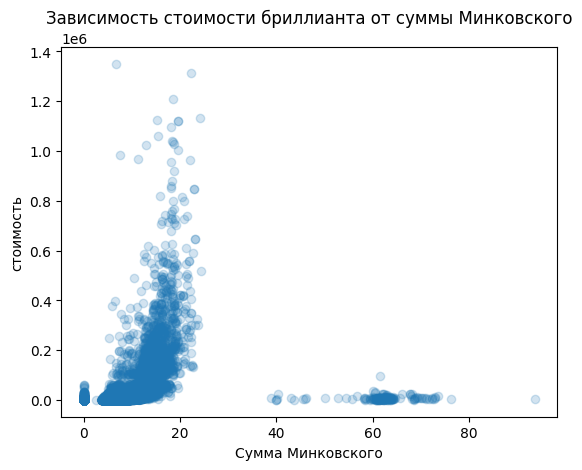

In [ ]:
# your code here

plt.scatter(X_train, y_train, alpha = 0.2)
plt.ylabel('стоимость')
plt.xlabel('Сумма Минковского')
plt.title('Зависимость стоимости бриллианта от суммы Минковского')
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

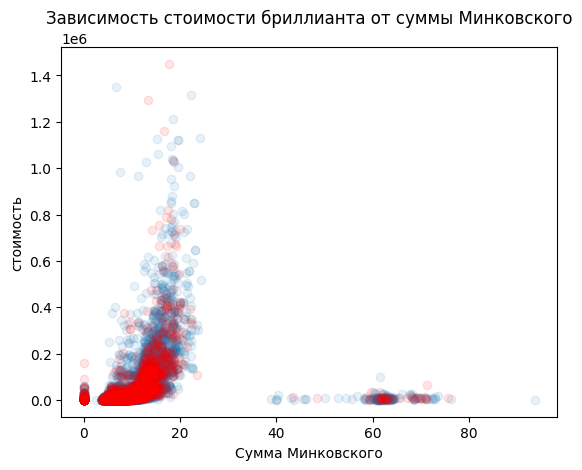

In [ ]:
plt.scatter(X_train, y_train, alpha = 0.1)
plt.scatter(X_test, y_test, color = "red", alpha = 0.1)
plt.xlabel('Сумма Минковского')
plt.ylabel('стоимость')
plt.title('Зависимость стоимости бриллианта от суммы Минковского')
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbor = NearestNeighbors(n_neighbors=1)
neighbor.fit(X_train)

distances, indexes = neighbor.kneighbors(X_test)
distances = distances.flatten()
indexes = indexes.flatten()

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here
different_price = np.abs(y_test[:, 0] - y_train[indexes, 0]) / y_train[indexes, 0] * 100
different_price

array([37.05583756, 14.36076339, 46.71814672, ..., 40.36697248,
        4.87804878,  9.19881306])

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

In [ ]:
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


In [ ]:
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

categories = ['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish']

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categories])

encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categories))

model_encoded = pd.concat([df, encoded_df], axis=1)
model_encoded.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,symmetry_Excellent,symmetry_Fair,symmetry_Good,symmetry_Poor,symmetry_Very Good,polish_Excellent,polish_Fair,polish_Good,polish_Poor,polish_Very Good
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

X = model_encoded.drop(['total_sales_price'], axis=1)
y = model_encoded['total_sales_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here
encoded_feature_names = encoder.get_feature_names_out(categories)

X_train_encoded = X_train[encoded_feature_names]
X_test_encoded = X_test[encoded_feature_names]

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_encoded, y_train)

DecisionTreeRegressor(random_state=42)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

def train_error(categories):
  encoder = OneHotEncoder(handle_unknown='ignore')
  encoded_features = encoder.fit_transform(df[categories])
  encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categories))
  model_encoded = pd.concat([df, encoded_df], axis=1)

  X = model_encoded.drop(['total_sales_price'], axis=1)
  y = model_encoded['total_sales_price']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  encoded_feature_names = encoder.get_feature_names_out(categories)
  X_train_encoded = X_train[encoded_feature_names]
  X_test_encoded = X_test[encoded_feature_names]
  model = DecisionTreeRegressor(random_state=42)
  model.fit(X_train_encoded, y_train)

  y_pred = model.predict(X_test_encoded)
  return mean_squared_error(y_test, y_pred)

На данном этапе вычисляются ошибки при всевозможных комбинациях категориальных признаков

In [ ]:
min_error = 10e15
best_categories = []
for i in range(2, 7):
  for category in combinations(categories, i):
    error = train_error(list(category))
    if (min_error > error):
      min_error = error
      best_categories = category
    print(list(category), error)

['cut', 'color'] 760107914.63695
['cut', 'clarity'] 764173629.5967107
['cut', 'cut_quality'] 764613777.6185688
['cut', 'lab'] 761524635.5716286
['cut', 'symmetry'] 758922503.3450514
['cut', 'polish'] 763207646.4829445
['color', 'clarity'] 767725994.3848253
['color', 'cut_quality'] 765470831.7182705
['color', 'lab'] 766135259.0941435
['color', 'symmetry'] 769768851.4773911
['color', 'polish'] 769524598.1046368
['clarity', 'cut_quality'] 766829100.4895717
['clarity', 'lab'] 771972051.4718072
['clarity', 'symmetry'] 771669053.5085881
['clarity', 'polish'] 774436398.6503354
['cut_quality', 'lab'] 764966365.3540657
['cut_quality', 'symmetry'] 763468662.8812913
['cut_quality', 'polish'] 767557946.3461168
['lab', 'symmetry'] 769530880.7606229
['lab', 'polish'] 771842735.1569984
['symmetry', 'polish'] 773224385.1536158
['cut', 'color', 'clarity'] 757746330.6585169
['cut', 'color', 'cut_quality'] 760005618.5708221
['cut', 'color', 'lab'] 756677765.2377796
['cut', 'color', 'symmetry'] 759221998.

In [ ]:
print(f'Minimal value error: {min_error}. This value has been achieved in categories: {best_categories}')

Minimal value error: 749287946.2657617. This value has been achieved in categories: ('cut', 'color', 'clarity', 'lab')


(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)

Наименьшее значение ошибки достигается при рассмотрении категориальных признаков 'cut', 'color', 'clarity', 'lab'.

Готовые инструменты - весьма мощнный инструмент для работы с большими объемами данных и обучения моделей, зато собственный код позволяет лучше понять, как работают многие функции и алгоритмы.  